In [2]:
import json
import os

HEAD_LLM_ONLY = "./output/LLM_Only/"
HEAD_LLM_MSK = "./output/LLM_with_MSK/"

models = ["llama3.1-8b", "qwen2.5-7b", "qwen2.5-14b"]
datasets = ["MQuAKE-CF-3k-v2", "strategyqa"]
k = 6  # number of masked heads (for MSK)

def load_json(path):
    with open(path, "r") as f:
        return json.load(f)

results = []

for model in models:
    for dataset in datasets:

        # -------- LLM ONLY --------
        llm_only_path = os.path.join(
            HEAD_LLM_ONLY,
            f"{model}_{dataset}",
            "result.json"
        )

        if os.path.exists(llm_only_path):
            res = load_json(llm_only_path)
            results.append({
                "model": model,
                "dataset": dataset,
                "setting": "LLM_Only",
                "accuracy": round(res.get("accuracy")*100,2),
               
            })

        # -------- LLM WITH MSK --------
        if dataset == "strategyqa":
            msk_path = os.path.join(
                HEAD_LLM_MSK,
                f"{model}_{dataset}_{k}",
                "result.json"
            )

            if os.path.exists(msk_path):
                res = load_json(msk_path)
                results.append({
                    "model": model,
                    "dataset": dataset,
                    "setting": f"LLM_MSK_{k}",
                    "accuracy": round(res.get("accuracy")*100,2),
                })

        elif dataset == "MQuAKE-CF-3k-v2":
            msk_path = os.path.join(
                HEAD_LLM_MSK,
                f"{model}_{dataset}_{k}",
                "result.json"
            )

            if os.path.exists(msk_path):
                res = load_json(msk_path)
                results.append({
                    "model": model,
                    "dataset": dataset,
                    "setting": f"LLM_MSK_{k}",
                   
                    "accuracy": round(res.get("accuracy_multiple_cor_bon")*100,2)
                   
                })

# -------- PRINT RESULTS --------
for r in results:
    print(r)


{'model': 'llama3.1-8b', 'dataset': 'MQuAKE-CF-3k-v2', 'setting': 'LLM_Only', 'accuracy': 24.6}
{'model': 'llama3.1-8b', 'dataset': 'MQuAKE-CF-3k-v2', 'setting': 'LLM_MSK_6', 'accuracy': 54.3}
{'model': 'llama3.1-8b', 'dataset': 'strategyqa', 'setting': 'LLM_Only', 'accuracy': 69.61}
{'model': 'llama3.1-8b', 'dataset': 'strategyqa', 'setting': 'LLM_MSK_6', 'accuracy': 79.24}
{'model': 'qwen2.5-7b', 'dataset': 'MQuAKE-CF-3k-v2', 'setting': 'LLM_Only', 'accuracy': 35.53}
{'model': 'qwen2.5-7b', 'dataset': 'MQuAKE-CF-3k-v2', 'setting': 'LLM_MSK_6', 'accuracy': 32.73}
{'model': 'qwen2.5-7b', 'dataset': 'strategyqa', 'setting': 'LLM_Only', 'accuracy': 72.27}
{'model': 'qwen2.5-7b', 'dataset': 'strategyqa', 'setting': 'LLM_MSK_6', 'accuracy': 80.27}
{'model': 'qwen2.5-14b', 'dataset': 'MQuAKE-CF-3k-v2', 'setting': 'LLM_Only', 'accuracy': 38.13}
{'model': 'qwen2.5-14b', 'dataset': 'MQuAKE-CF-3k-v2', 'setting': 'LLM_MSK_6', 'accuracy': 43.1}
{'model': 'qwen2.5-14b', 'dataset': 'strategyqa', 's

In [44]:
import pandas as pd

df = pd.DataFrame(results)

# -------- LLM ONLY --------
df_llm_only = (
    df[df["setting"] == "LLM_Only"]
    .loc[:, ["model", "dataset", "accuracy"]]
    .sort_values(by=["dataset", "model"])
    .reset_index(drop=True)
)

# -------- LLM WITH MSK --------
df_llm_msk = (
    df[df["setting"] != "LLM_Only"]
    .loc[:, ["model", "dataset", "accuracy"]]
    .sort_values(by=["dataset", "model"])
    .reset_index(drop=True)
)



In [45]:
print("=== LLM ONLY ===")
df_llm_only




=== LLM ONLY ===


,model,dataset,accuracy
0,llama3.1-8b,MQuAKE-CF-3k-v2,24.60
1,qwen2.5-14b,MQuAKE-CF-3k-v2,38.13
2,qwen2.5-7b,MQuAKE-CF-3k-v2,35.53
3,llama3.1-8b,strategyqa,69.61
4,qwen2.5-14b,strategyqa,73.58
5,qwen2.5-7b,strategyqa,72.27


In [46]:
print("\n=== LLM WITH MSK ===")
df_llm_msk



=== LLM WITH MSK ===


,model,dataset,accuracy
0,llama3.1-8b,MQuAKE-CF-3k-v2,54.30
1,qwen2.5-14b,MQuAKE-CF-3k-v2,43.10
2,qwen2.5-7b,MQuAKE-CF-3k-v2,32.73
3,llama3.1-8b,strategyqa,79.24
4,qwen2.5-14b,strategyqa,84.67
5,qwen2.5-7b,strategyqa,80.27


In [47]:
df_compare = (
    df_llm_only
    .merge(
        df_llm_msk,
        on=["model", "dataset"],
        how="left",
        suffixes=("_LLM_Only", "_LLM_MSK")
    )
    .sort_values(by=["dataset", "model"])
    .reset_index(drop=True)
)

# Optionnel : gain absolu
df_compare["delta"] = (
    df_compare["accuracy_LLM_MSK"] - df_compare["accuracy_LLM_Only"]
)

df_compare



,model,dataset,accuracy_LLM_Only,accuracy_LLM_MSK,delta
0,llama3.1-8b,MQuAKE-CF-3k-v2,24.60,54.30,29.70
1,qwen2.5-14b,MQuAKE-CF-3k-v2,38.13,43.10,4.97
2,qwen2.5-7b,MQuAKE-CF-3k-v2,35.53,32.73,-2.80
3,llama3.1-8b,strategyqa,69.61,79.24,9.63
4,qwen2.5-14b,strategyqa,73.58,84.67,11.09
5,qwen2.5-7b,strategyqa,72.27,80.27,8.00


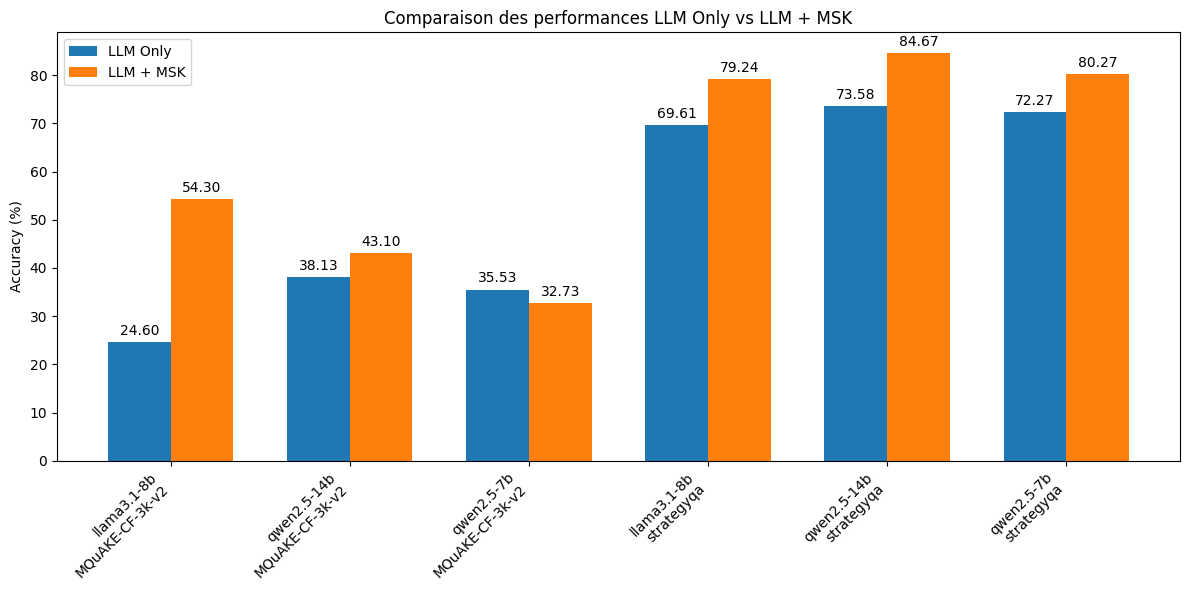

In [48]:
import matplotlib.pyplot as plt
import numpy as np

# Données
labels = df_compare['model'] + "\n" + df_compare['dataset']  # combiner modèle + dataset
llm_only = df_compare['accuracy_LLM_Only']
llm_msk = df_compare['accuracy_LLM_MSK']

x = np.arange(len(labels))  # positions sur l'axe x
width = 0.35  # largeur des barres

fig, ax = plt.subplots(figsize=(12, 6))

# Barres
rects1 = ax.bar(x - width/2, llm_only, width, label='LLM Only')
rects2 = ax.bar(x + width/2, llm_msk, width, label='LLM + MSK')

# Labels et titres
ax.set_ylabel('Accuracy (%)')
ax.set_title('Comparaison des performances LLM Only vs LLM + MSK')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.legend()

# Ajouter valeurs au-dessus des barres
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0,3),  # décalage vertical
                textcoords="offset points",
                ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Séparer les datasets
df_mquake = df_compare[df_compare['dataset'] == 'MQuAKE-CF-3k-v2']
df_strategy = df_compare[df_compare['dataset'] == 'strategyqa']

def plot_accuracy(df, dataset_name):
    labels = df['model']
    llm_only = df['accuracy_LLM_Only']
    llm_msk = df['accuracy_LLM_MSK']
    
    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots(figsize=(8,5))
    rects1 = ax.bar(x - width/2, llm_only, width, label='LLM Only')
    rects2 = ax.bar(x + width/2, llm_msk, width, label='LLM + MSK')

    ax.set_ylabel('Accuracy (%)')
    ax.set_title(f'Accuracy - {dataset_name}')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylim(0, 100)
    ax.legend()

    # Ajouter valeurs au-dessus des barres
    for rect in rects1 + rects2:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0,3),
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()




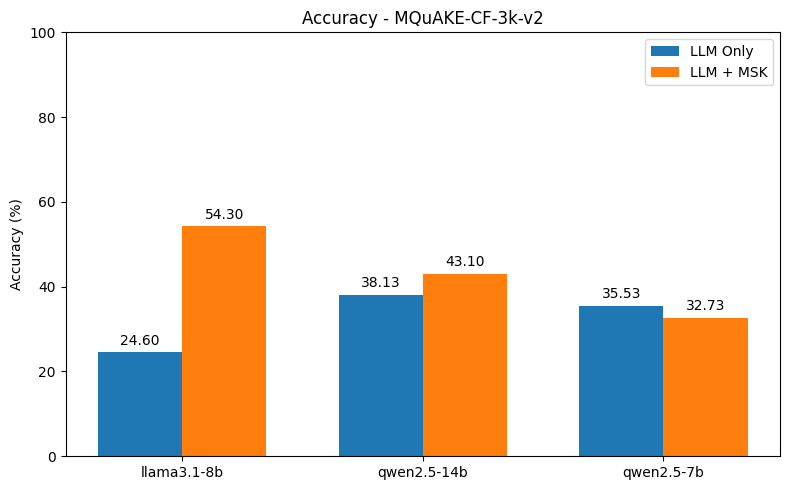

In [51]:
# Plot pour MQuAKE
plot_accuracy(df_mquake, 'MQuAKE-CF-3k-v2')



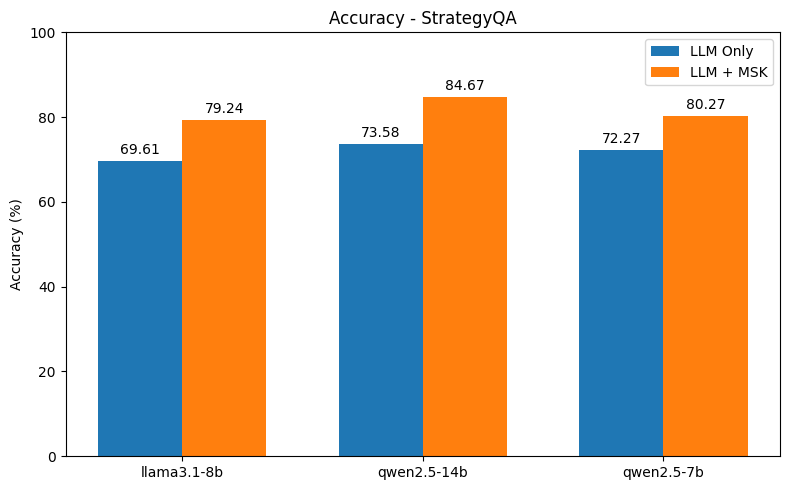

In [52]:
# Plot pour StrategyQA
plot_accuracy(df_strategy, 'StrategyQA')